In [182]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")
df = pd.read_csv(f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")

Path to dataset files: /Users/nikitabykov/.cache/kagglehub/datasets/anthonypino/melbourne-housing-market/versions/27/MELBOURNE_HOUSE_PRICES_LESS.csv


In [183]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [184]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [185]:
len(df["SellerG"].unique())

476

In [186]:
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available. 


In [187]:
# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

In [188]:
drop_columns = ["SellerG", "Address", "Suburb", "CouncilArea"]

for col in drop_columns:
    df = df.drop(col, axis=1)
    
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Convert date to total seconds since Unix epoch
df['Date'] = (df['Date'] - pd.Timestamp('1970-01-01')).dt.total_seconds()

In [189]:
df.isnull().sum()

Rooms                0
Type                 0
Price            14590
Method               0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
dtype: int64

In [190]:
df.count()

Rooms            63023
Type             63023
Price            48433
Method           63023
Date             63023
Postcode         63023
Regionname       63023
Propertycount    63023
Distance         63023
dtype: int64

In [191]:
df = df.dropna()

In [192]:
df.count()

Rooms            48433
Type             48433
Price            48433
Method           48433
Date             48433
Postcode         48433
Regionname       48433
Propertycount    48433
Distance         48433
dtype: int64

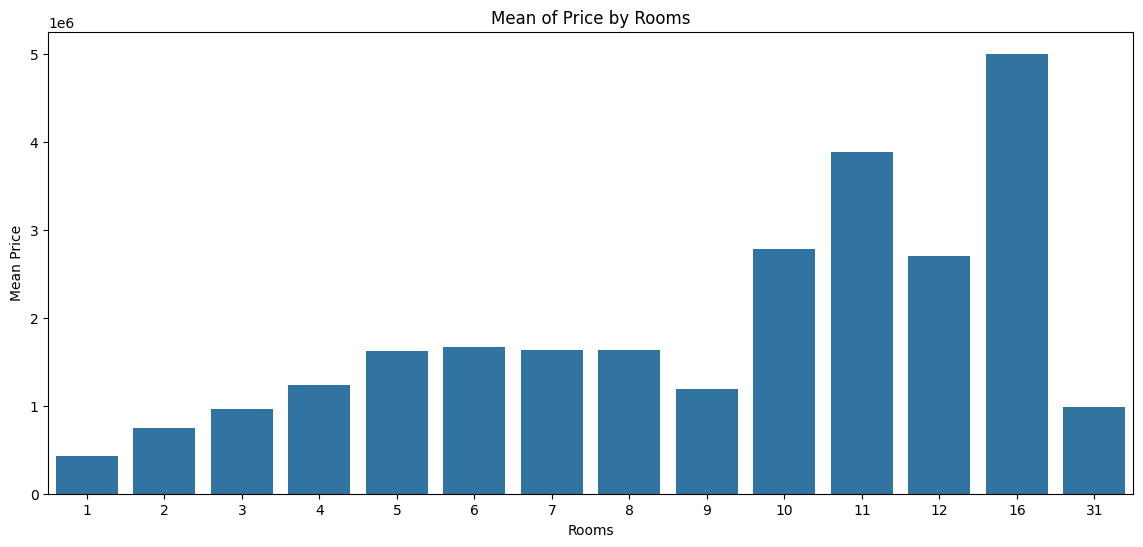

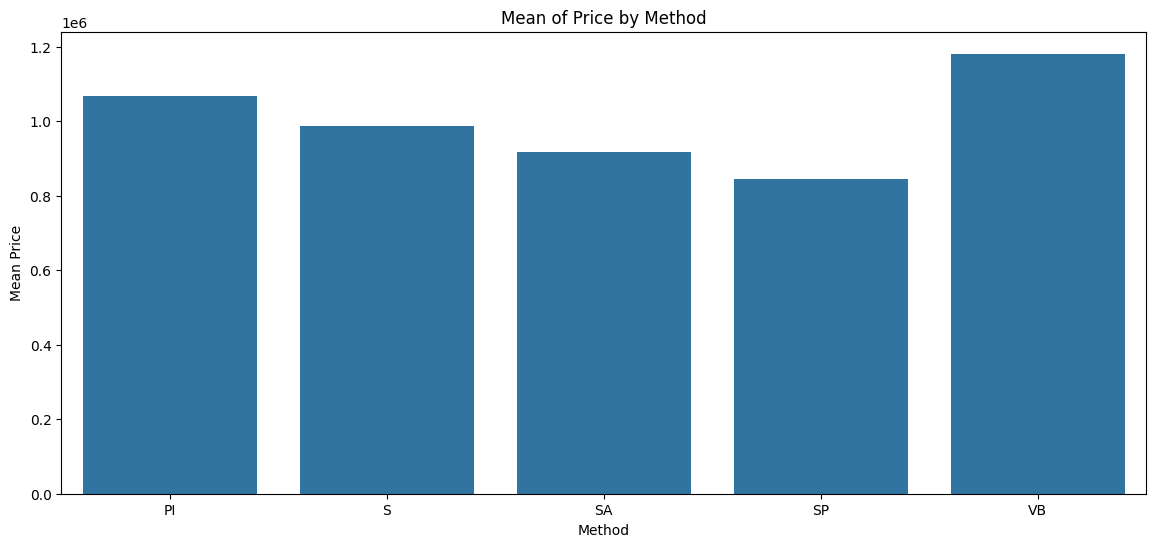

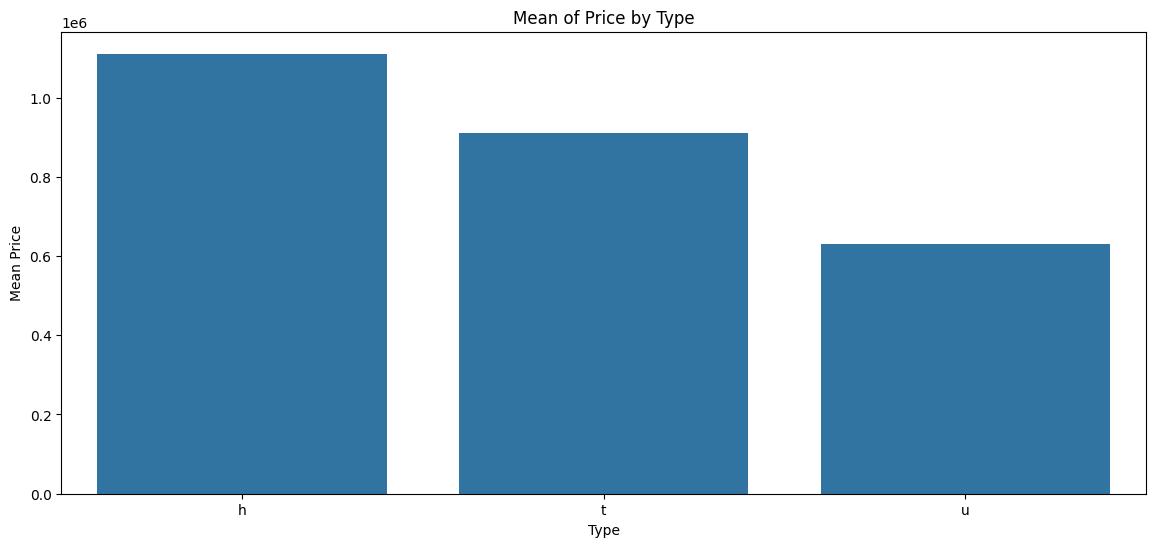

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_89867/1577082130.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


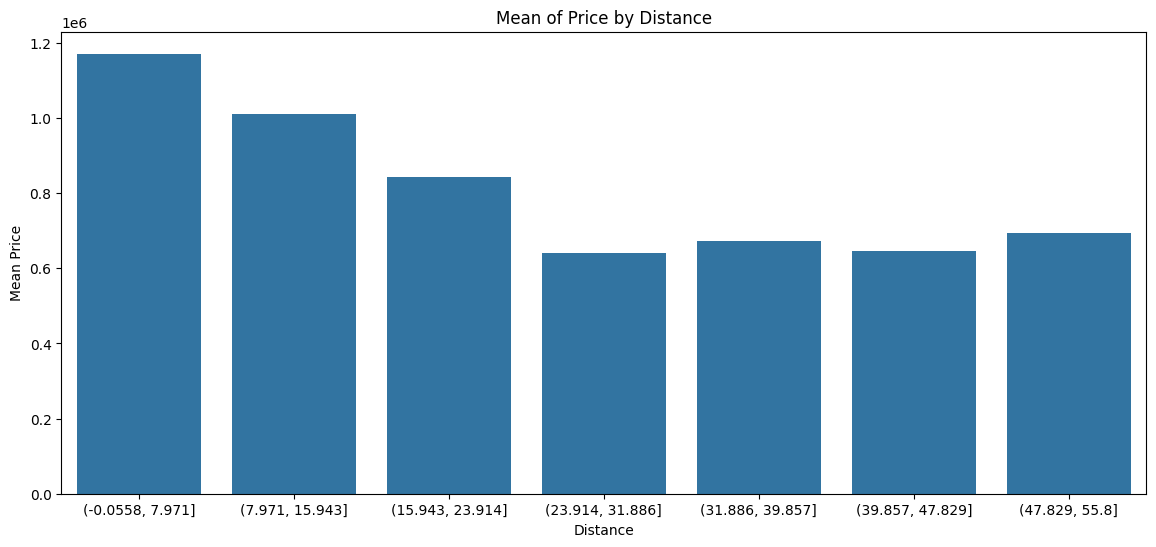

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_89867/1577082130.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


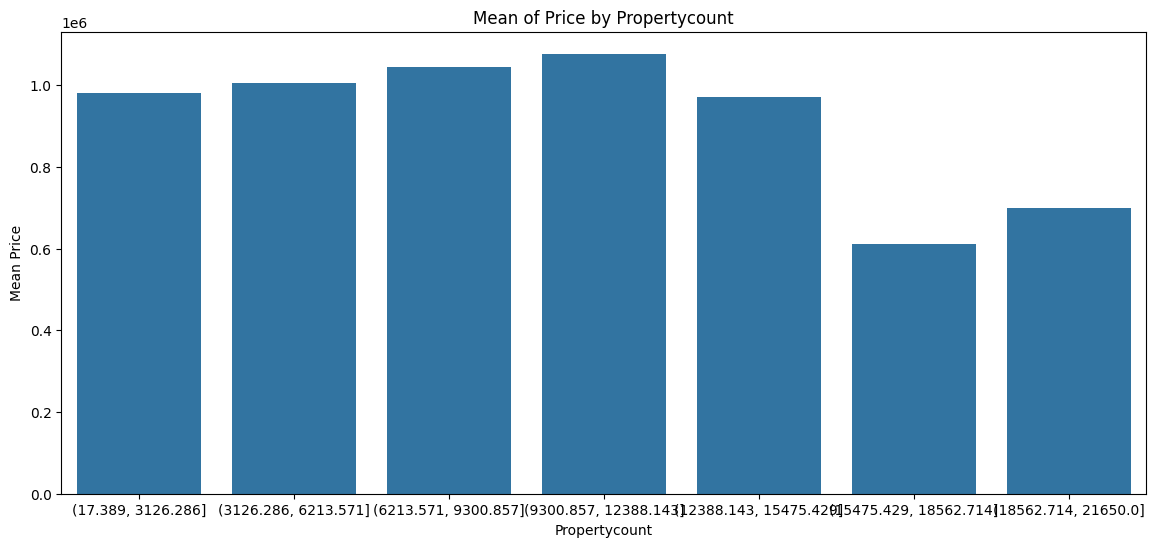

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_89867/1577082130.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


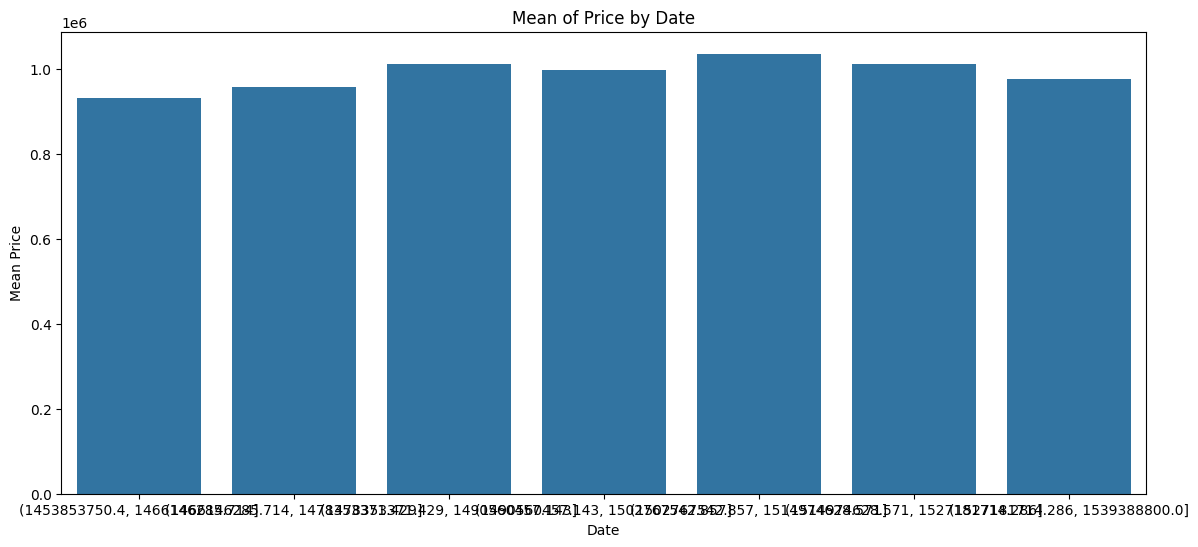

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

df_target = df["Price"]
df_target_name = "Price"

discrete_data_columns = ["Rooms"]
continuous_data_columns = ["Distance", "Propertycount", "Date"]
number_data_columns = discrete_data_columns + continuous_data_columns
categorical_data_columns = ["Regionname", "Method", "Type"]

plt.rcParams['figure.figsize'] = (14, 6)

for column in discrete_data_columns + ["Method", "Type"]:
    # Calculate the mean of 'target' by 'group'
    mean_target_by_group = df.groupby(column)[df_target_name].mean()
    
    mean_target_by_group = mean_target_by_group.reset_index()

    # Plot
    sns.barplot(data=mean_target_by_group, x=column, y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()


for column in continuous_data_columns:
    # Calculate the mean of 'target' by 'group'# Bin 'x' into discrete categories
    df_grouped_cont = df.copy()
    df_grouped_cont['x_bin'] = pd.cut(df_grouped_cont[column], bins=7)
    
    # Calculate mean of 'y' for each bin
    aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()

    # Plot
    sns.barplot(data=aggregated_data, x='x_bin', y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()
    

# sns.countplot(data=df, x='Rooms', y=df_target_name, kde=True)
# plt.title('Scatter Plot of Feature1 vs Target')
# plt.show()

# for i in range(len(df.columns)-1):
#     sns.histplot(data=df, bins=15, stat=count x=df.columns[i],hue="Price",ax=axs[i])

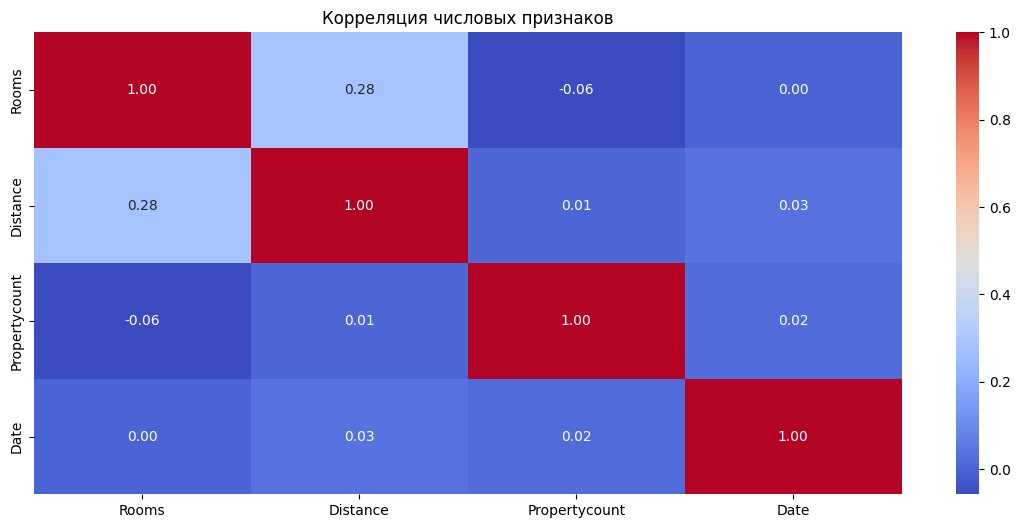

In [159]:
sns.heatmap(df[number_data_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция числовых признаков')
plt.show()

In [195]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



# print(df.shape)
# # Initialize OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # drop='first' avoids the dummy variable trap

# # Fit and transform the categorical data (Color and Size)
# encoded_columns = encoder.fit_transform(df[categorical_data_columns])
# print(encoded_columns)

# # Convert the encoded columns into a DataFrame with appropriate column names
# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_data_columns))

# encoded_df = encoded_df.reset_index(inplace=False)
# print(encoded_df.columns)
# print(encoded_df.count)



# # Concatenate the encoded columns with the original DataFrame (excluding the original categorical columns)
# df_encoded = pd.concat([df.drop(columns=categorical_data_columns, axis=1), encoded_df], axis=1)

# print(df_encoded.columns)
# print(df_encoded.count)

df_encoded = pd.get_dummies(df, columns=categorical_data_columns)
print(df_encoded.columns)

X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_encoded[df_target_name], test_size = 0.3, random_state = 42)

Index(['Rooms', 'Price', 'Date', 'Postcode', 'Propertycount', 'Distance',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object')


In [196]:
print(df_encoded.head())

   Rooms      Price          Date  Postcode  Propertycount  Distance  \
0      3  1490000.0  1.491005e+09      3067           4019       3.0   
1      3  1220000.0  1.491005e+09      3067           4019       3.0   
2      3  1420000.0  1.491005e+09      3067           4019       3.0   
3      3  1515000.0  1.491005e+09      3040           1543       7.5   
4      2   670000.0  1.491005e+09      3042           3464      10.4   

   Regionname_Eastern Metropolitan  Regionname_Eastern Victoria  \
0                            False                        False   
1                            False                        False   
2                            False                        False   
3                            False                        False   
4                            False                        False   

   Regionname_Northern Metropolitan  Regionname_Northern Victoria  ...  \
0                              True                         False  ...   
1               

In [197]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [199]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None,
                                feature_names=df_encoded.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':df_encoded.columns, 'importance': dtr.feature_importances_})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()